<a href="https://colab.research.google.com/github/AfrizalDS/MachineLearning/blob/Jobsheet-7/Praktikum_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 3**
## **Self-optimizing Map (SOM)**
Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.

**instalasi SOM**

In [4]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=39dcbd6816d3f3d084e99fb231391e157d9d98636258fd41babfb47ae8468aa0
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [5]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


**Gunakan dataset Iris sebagai contoh**

In [6]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

**Normalisasi dataset agar nilainya berada dalam rentang yang seragam.**

In [7]:
# Normalisasi data
data = data / data.max(axis=0)

**Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM**

In [8]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

**Inisialisasi bobot SOM secara acak.**

In [9]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

**Melatih SOM dengan data menggunakan metode train_random.**

In [10]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

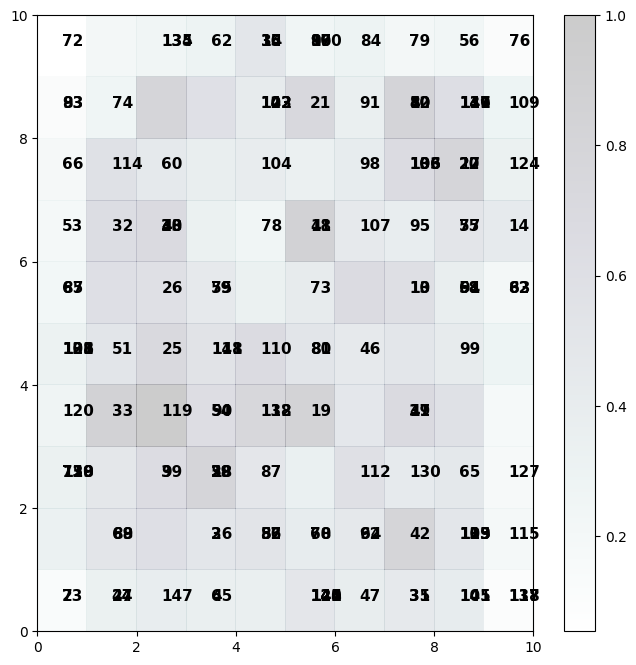

In [11]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()